In [6]:
import scipy as sp
import numpy as np
import pandas as pd

In [11]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

<h1><font face="Times"; size = 25; color = "lightgreen"> ANOVA

<div class="alert alert-block alert-info">
    <b><font color = 'Black'; size = 4; face = "Callibri"> Definition:</font></b> <hr>
    Analysis of Variance (ANOVA) is a statistical technique used to analyze the differences among group means in a sample. It assesses whether the means of two or more groups are statistically significantly different from each other. ANOVA is used when you have a categorical independent variable (with two or more groups) and a continuous dependent variable.

# 1. One-Way ANOVA

## One-Way ANOVA: Assumptions

For the results of a one-way ANOVA to be valid, the following assumptions should be met:

1. Normality – Each sample was drawn from a normally distributed population.

2. Equal Variances – The variances of the populations that the samples come from are equal. You can use Bartlett’s Test to verify this assumption.

3. Independence – The observations in each group are independent of each other and the observations within groups were obtained by a random sample.

## One-Way ANOVA: The Process

A one-way ANOVA uses the following null and alternative hypotheses:

- $H_0$ (null hypothesis): $μ_1 = μ_2 = μ_3 = … = μ_k$ (all the population means are equal)
- $H_1$ (alternative hypothesis): at least one population mean is different from the rest

## Example 1:

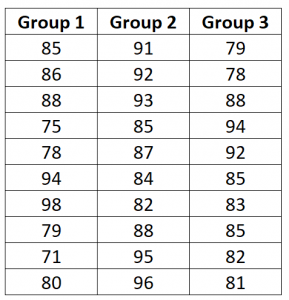

In [3]:
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

In [4]:
sp.stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.3575322551335636, pvalue=0.11384795345837218)

The F test statistic is 2.3575 and the corresponding p-value is 0.1138. Since the p-value is not less than .05, <u>we fail to reject the null hypothesis</u>.

<mark> This means we do not have sufficient evidence to say that there is a difference in exam scores among the three studying techniques.

# 2. Two-way ANOVA

A two-way ANOVA (“analysis of variance”) is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups that have been split on two variables (sometimes called “factors”).You should use a two-way ANOVA when you’d like to know how two factors affect a response variable and whether or not there is an interaction effect between the two factors on the response variable.

## Two-Way ANOVA Assumptions

For the results of a two-way ANOVA to be valid, the following assumptions should be met:

1. Normality – The response variable is approximately normally distributed for each group.

2. Equal Variances – The variances for each group should be roughly equal.

3. Independence – The observations in each group are independent of each other and the observations within groups were obtained by a random sample.

## Example 2:

A botanist wants to know whether or not plant growth is influenced by sunlight exposure and watering frequency. She plants 30 seeds and lets them grow for two months under different conditions for sunlight exposure and watering frequency. After two months, she records the height of each plant, in inches.

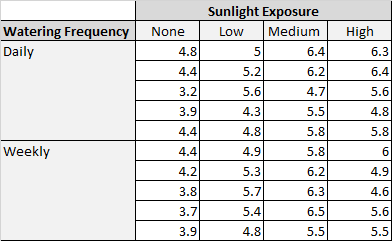

In [7]:
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

In [9]:
df.head()

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6


In [12]:
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


We can see the following p-values for each of the factors in the table:

- water: p-value = .000527
- sun: p-value = .0000002
- water*sun: p-value = .120667

Since the p-values for water and sun are both less than .05, this means that both factors have a statistically significant effect on plant height.

And since the p-value for the interaction effect (.120667) is not less than .05, this tells us that there is no significant interaction effect between sunlight exposure and watering frequency.

# 3. Three-way ANOVA

A three-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups that have been split on three factors.

## Example 3:

Suppose a researcher wants to determine if two training programs lead to different mean improvements in jumping height among college basketball players.

The researcher suspects that gender and division (Division I or II) may also affect jumping height so he collects data for these factors as well.

His goal is to perform a three-way ANOVA to determine how training program, gender, and division affect jumping height.

In [13]:
df = pd.DataFrame({'program': np.repeat([1, 2], 20),
                   'gender': np.tile(np.repeat(['M', 'F'], 10), 2),
                   'division': np.tile(np.repeat([1, 2], 5), 4),
                   'height': [7, 7, 8, 8, 7, 6, 6, 5, 6, 5,
                              5, 5, 4, 5, 4, 3, 3, 4, 3, 3,
                              6, 6, 5, 4, 5, 4, 5, 4, 4, 3,
                              2, 2, 1, 4, 4, 2, 1, 1, 2, 1]})

In [14]:
df.head()

,program,gender,division,height
0,1,M,1,7
1,1,M,1,7
2,1,M,1,8
3,1,M,1,8
4,1,M,1,7


In [15]:
model = ols("""height ~ C(program) + C(gender) + C(division) +
               C(program):C(gender) + C(program):C(division) + C(gender):C(division) +
               C(program):C(gender):C(division)""", data=df).fit()

In [16]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(program),3.610000e+01,1.0,6.563636e+01,2.983934e-09
C(gender),6.760000e+01,1.0,1.229091e+02,1.714432e-12
C(division),1.960000e+01,1.0,3.563636e+01,1.185218e-06
C(program):C(gender),4.660750e-30,1.0,8.474092e-30,1.000000e+00
C(program):C(division),4.000000e-01,1.0,7.272727e-01,4.001069e-01
C(gender):C(division),1.000000e-01,1.0,1.818182e-01,6.726702e-01
C(program):C(gender):C(division),1.000000e-01,1.0,1.818182e-01,6.726702e-01
Residual,1.760000e+01,32.0,NaN,NaN


From the output we can see that none of the interactions between the three factors were statistically significant.

We can also see that each of the three factors (program, gender, and division) were statistically significant with the following p-values:
- P-value of program: 0.00000000298
- P-value of gender: 0.00000000000171
- P-value of division: 0.00000185

In conclusion, we would state that training program, gender, and division are all significant predictors of the jumping height increase among players.